<a href="https://colab.research.google.com/github/Gabriel-Leite-Py/DIO_Exercices/blob/main/YOLOv8_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLOv8.2


This project aims to train the YOLOv8.2 network for object detection, utilizing datasets available on the RoboFlow website. The implementation of YOLOv8.2 is carried out with the objective of developing a robust and accurate detection model capable of identifying objects in images with high efficiency. The datasets from RoboFlow provide a wide variety of labeled images, covering diverse categories of objects, enabling comprehensive and diversified training of the model.

In [5]:
!nvidia-smi

Sun May 12 18:49:36 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [6]:
!pip install ultralytics

In [8]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.2.13 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.8/78.2 GB disk)

OS                  Linux-6.1.58+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.30GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.2.1+cu121>=1.8.0
torchvision         ✅ 0.17.1+cu121>=0.9.0
tqdm                ✅ 4.66.4>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0


In [11]:
# Run inference on an image with YOLOv8n
!yolo predict model=yolov8n.pt source='test_image.jpg'

Ultralytics YOLOv8.2.13 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/test_image.jpg: 416x640 2 persons, 1 bicycle, 1 car, 2 dogs, 204.1ms
Speed: 3.3ms preprocess, 204.1ms inference, 2467.9ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="cwZoxIi26VW4I1o3IBH3")
project = rf.workspace("smart-parking-zos3v").project("smart-parking-0lbad")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.13, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to smart-parking-2 in yolov8:: 100%|██████████| 5608/5608 [00:00<00:00, 7216.32it/s]


In [9]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

Ultralytics YOLOv8.2.13 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/smart-parking-2/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

In [11]:
!yolo task=detect mode=predict model=yolov8m.pt data={dataset.location}/data.yaml source=/content/test.jpeg


Ultralytics YOLOv8.2.13 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m summary (fused): 218 layers, 25886080 parameters, 0 gradients, 78.9 GFLOPs

image 1/1 /content/test.jpeg: 384x640 22 cars, 98.5ms
Speed: 3.4ms preprocess, 98.5ms inference, 2358.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


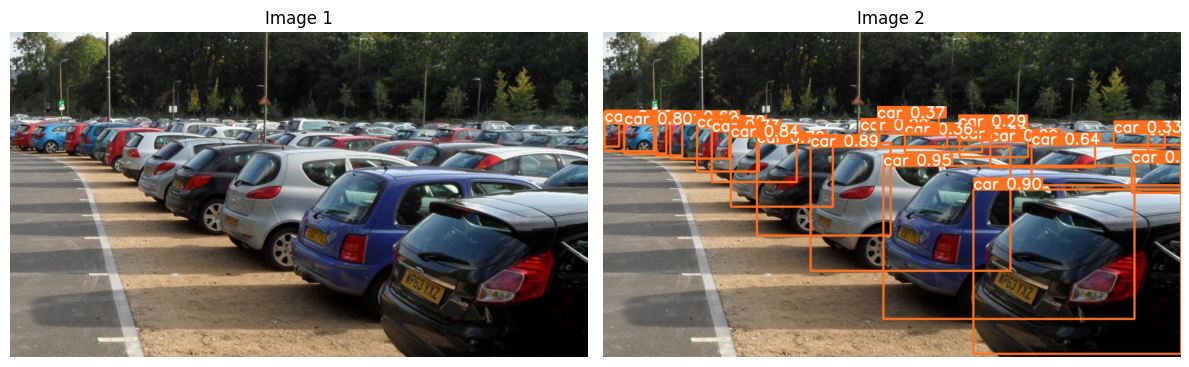

In [15]:
import matplotlib.pyplot as plt
from PIL import Image

# Carregar as imagens
image_path1 = "/content/test.jpeg"
image_path2 = "/content/runs/detect/predict3/test.jpeg"
image1 = Image.open(image_path1)
image2 = Image.open(image_path2)

# Criar a figura e os subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotar a primeira imagem no primeiro subplot
axes[0].imshow(image1)
axes[0].set_title('Image 1')
axes[0].axis('off')

# Plotar a segunda imagem no segundo subplot
axes[1].imshow(image2)
axes[1].set_title('Image 2')
axes[1].axis('off')

# Ajustar o layout
plt.tight_layout()

# Exibir o plot
plt.show()